In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import KFold, cross_val_score
import pickle

# Projet Science des données

### 1 Descriptif du projet

L’objectif est de vous placer dans le contexte d’un projet de science des
données de type classification supervisée. Il s’agit de vous faire pratiquer les
principales étapes de ce type de projet en s’appuyant sur des données réelles
comme celles que l’on peut trouver dans différents entrepôts en accès libre.

Vous allez travailler sur un jeu de données disponible sur MyLearningSpace,
un fichier présentant les différentes variables est également disponible. Pour des
raisons didactiques, nous avons légèrement modifié ce jeu de données mais la
plupart des valeurs sont d’origine.

Il est important de préciser que le travail que vous allez accomplir au cours
de ce projet n’est pas spécifiquement lié au jeu de données sélectionné. On
retrouve systématiquement la plupart des étapes de ce travail dans un projet de
classification de données. Il est donc conseillé de bien comprendre l’objectif de
chaque étape et la façon d’atteindre cet objectif. Cela vous servira certainement
dans le cadre d’autres projets de même nature.

### 2 Travail à réaliser

Le travail à réaliser se décompose en plusieurs étapes qui sont
caractéristiques d’un projet de science des données (comme indiqué
dans le cours). Il y a généralement des étapes consacrées à la compréhension des
données, à la préparation des données, à l’entrâınement et la comparaison de
différents modèles puis à la sauvegarde du meilleur modèle obtenu pour l’inclure
dans le système en production.

Les étapes sont décrites dans les sections suivantes. Il est conseillé de suivre
l’ordre indiqué. Pour chaque étape, des explications et des indications de fonctions à utiliser dans différentes bibliothèques sont données. Votre travail consiste
à comprendre les explications, à explorer la documentation des fonctions mentionnées et à produire le code pour réaliser l’objectif de l’étape. A chaque étape,
pensez à vérifier que votre code produit bien le résultat attendu. Pour écrire
ce code, il est parfois nécessaire de s’appuyer sur le code écrit lors d’étapes
précédentes. C’est à vous d’évaluer le code qui doit être réutilisé.

En fin de projet, il faudra fournir vos codes commentés ainsi qu’un
rapport clair et concis rédigé à la manière d’un compte-rendu d’étude.
En particulier, vous vous attacherez à analyser les résultats obtenus
et à répondre aux différentes questions posées à chaque étape.

### 3 Importation des données (sujet)

Le jeu de données est disponible sur le site du cours sous la forme d’un
fichier CSV (Comma separated values). En utilisant la bibliothèque Pandas et sa
fonction read csv(), vous devez importer le fichier en mémoire pour permettre
la manipulation des données.

Afin de réaliser cet import, prenez le temps d’analyser le fichier de façon à
identifier les paramètres à fournir à la fonction read csv(). Si tout s’est bien
passé lors de l’importation, la fonction read csv() renvoie un objet de la classe
DataFrame.

Assurez-vous que l’importation est correcte en utilisant les fonctionnalités
offertes pour les objets DataFrame (voir le cours à cet effet), notamment l’affichage des informations sur les variables et leur type, ainsi que l’affichage des
premières lignes.

Il est important d’identifier les données d’entrée et la variable
de sortie correspondant à l’étiquette de classes. Après identification,
précisez clairement l’objectif du problème de classification à traiter.

### 3 Importation des données (réponse)


In [197]:
insurances = pd.read_csv('./data/car_insurance.csv')
insurances.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [198]:
insurances.dtypes

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

Le besoin ici est de prédire, en fonction des caracteristiques d'un futur contrat d'assurance donné, si le client fera un demande d'indémnisation dans le cadre du contrat. C'est un entre guillemets un indicateur de rentabilité pour l'assureur.

Les caractéristiques du contrat sont les colonnes du tableau (excepté id et outcome). On parle içi d'apprentissage supervisé car les données en sortie sont déjà etiquettées, on cherche simplement à retrouver des résultats/prédictions similaires à partir de nouveaux contrats dont on ne connait pas l'issue.

### 4 Examen des données (sujet)

Après avoir importé les données, il est important de comprendre leur structure. Plus votre compréhension des données sera fine, plus vous serez en mesure
de les transformer pour obtenir des modèles précis. Les éléments à connâıtre sur
vos données sont généralement :
- la taille du jeu de données
- le type des données (numérique : int, float ou qualitatif/catégoriel : object)
- la qualité des données (est-ce qu’il y a des données manquantes ou aberrantes ?)
- la distribution des données
- ...

En utilisant les méthodes de la classe DataFrame, procédez à l’examen des
données et notez les informations qui vous paraissent pertinentes. En particulier,
il est important d’identifier les données qualitatives, les données manquantes
(représentées par le symbole ’NA’ : Not Available) et les données aberrantes qui
devront toutes être pré-traitées avant la classification (pré-traitements à réaliser
dans la section 5).

En utilisant la méthode isna() de la classe DataFrame, vous pouvez détecter
s’il existe des données manquantes.

Une façon d’examiner les données à traiter est de construire une visualisation
de type histogramme pour chaque variable numérique. Pour rappel, un histogramme montre le nombre d’observations qui appartiennent à chaque plage de
valeurs donnée. Etudiez la méthode hist() de la classe DataFrame et utilisez-la
pour obtenir les histogrammes des variables numériques.

Quelles observations pouvez-vous faire à partir de ces diagrammes ? Vous
pouvez éventuellement identifier les données aberrantes, c’est-à-dire en dehors
de l’échelle de valeurs prises habituellement par une variable.


### 4 Examen des données (réponse)


In [199]:
len(insurances)

10000

In [200]:
insurances.dtypes.groupby(insurances.dtypes).apply(lambda x:  x.index.tolist()).to_dict()

{dtype('int64'): ['id',
  'age',
  'gender',
  'postal_code',
  'speeding_violations',
  'duis',
  'past_accidents'],
 dtype('float64'): ['credit_score',
  'vehicle_ownership',
  'married',
  'children',
  'annual_mileage',
  'outcome'],
 dtype('O'): ['driving_experience',
  'education',
  'income',
  'vehicle_year',
  'vehicle_type']}

In [201]:
insurances.isna().sum().to_frame().transpose()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,0,0,0,0,0,0,982,0,0,0,0,0,957,0,0,0,0,0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'vehicle_ownership'}>,
        <Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'postal_code'}>],
       [<Axes: title={'center': 'annual_mileage'}>,
        <Axes: title={'center': 'speeding_violations'}>,
        <Axes: title={'center': 'duis'}>,
        <Axes: title={'center': 'past_accidents'}>],
       [<Axes: title={'center': 'outcome'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

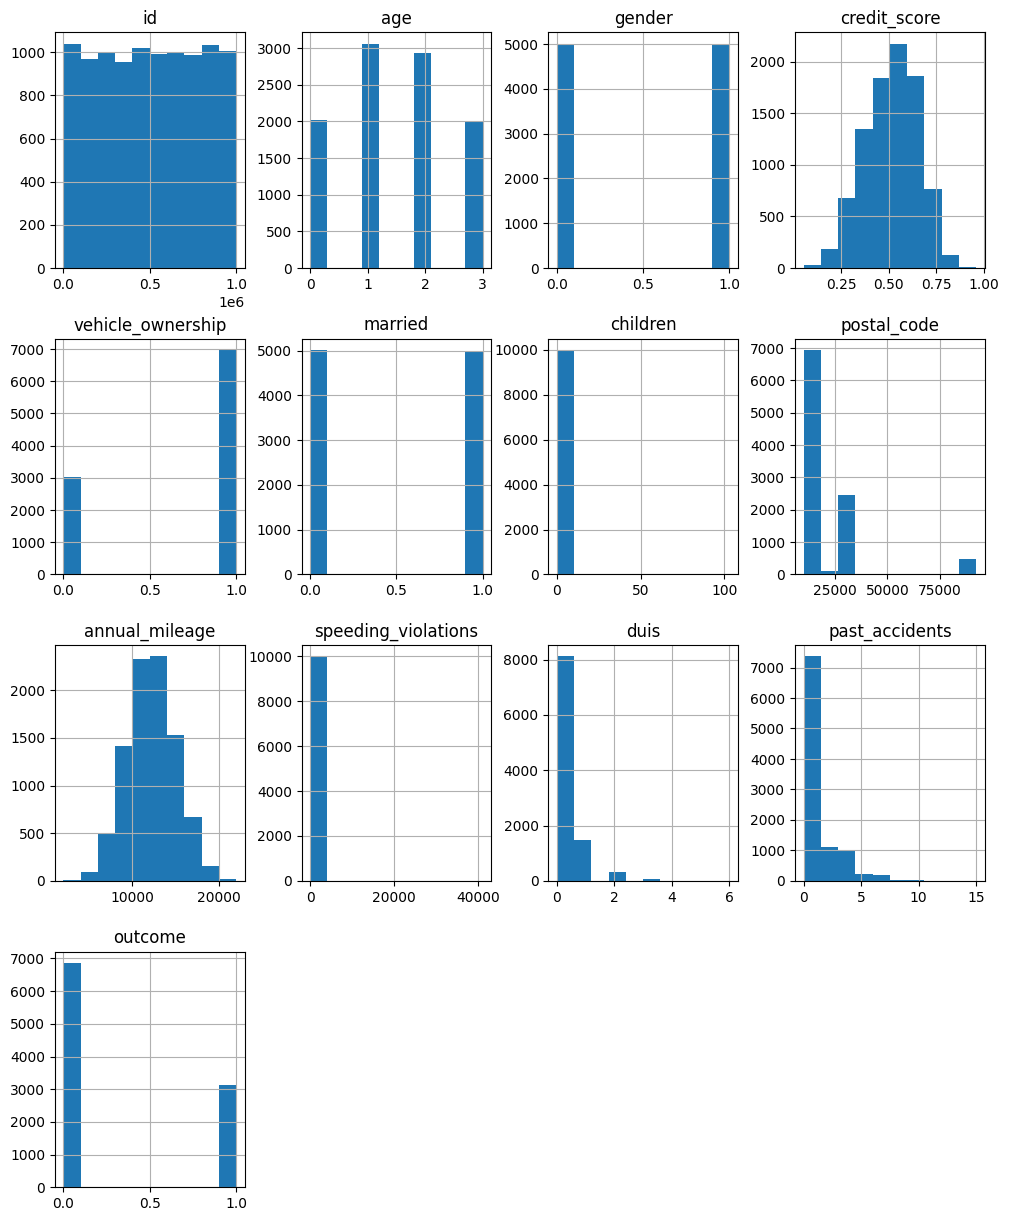

In [202]:
insurances.hist(figsize=(12, 15))

<Axes: xlabel='children'>

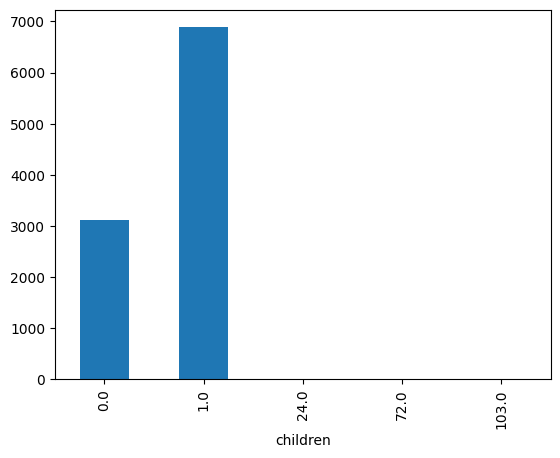

In [203]:
insurances.children.value_counts().sort_index().plot.bar()
# max coherant = 1

<Axes: xlabel='speeding_violations'>

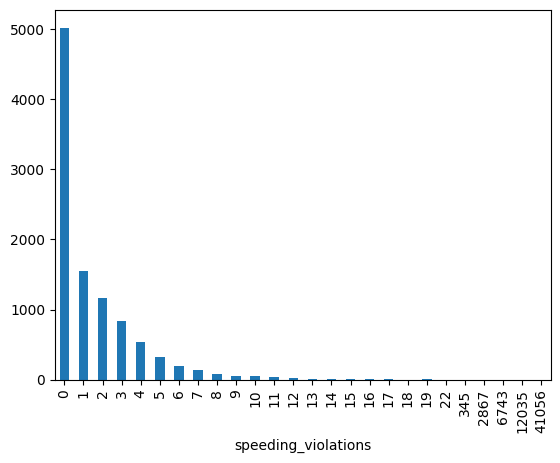

In [204]:
insurances.speeding_violations.value_counts().sort_index().plot.bar()
# max coherent = 22

982


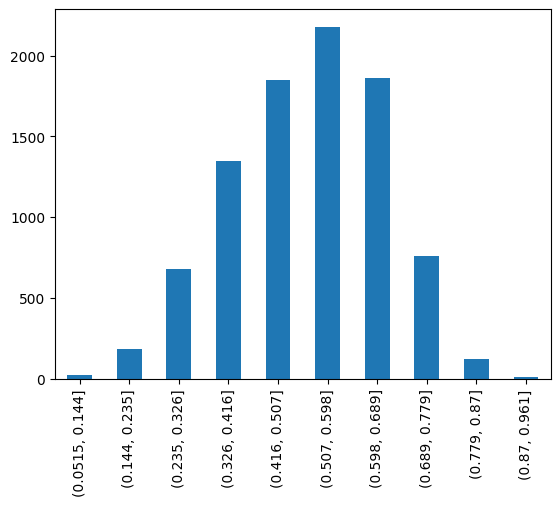

In [205]:
insurances.credit_score.value_counts(bins=10).sort_index().plot.bar()
print(insurances.credit_score.isnull().sum())

957


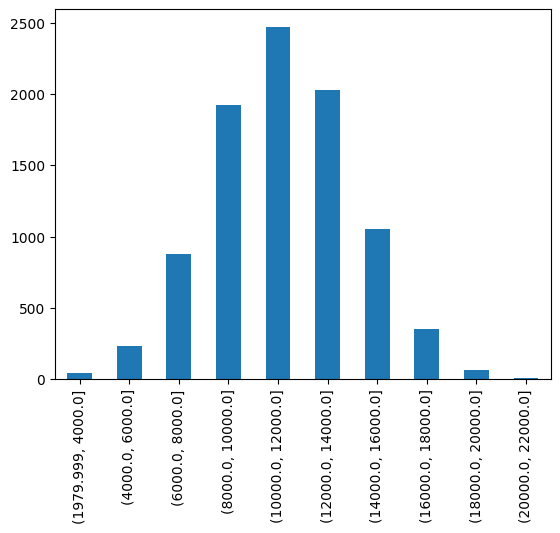

In [206]:
insurances.annual_mileage.value_counts(bins=10).sort_index().plot.bar()
print(insurances.annual_mileage.isnull().sum())

### 5 Préparation des données (sujet)

Pour faire fonctionner correctement les algorithmes de classification, il est nécessaire d’avoir des données de type numérique et de qualité, c’est-à-dire des données qui ne contiennent pas de valeurs manquantes ni de valeurs aberrantes.

Données manquantes : En analysant les données, vous avez dû noter si une variable possède des valeurs manquantes (’NA’). En utilisant la méthode isna() de la classe DataFrame et la fonction sum(), vous pouvez obtenir le nombre de valeurs manquantes pour chacune des variables. Pour résoudre le problème des valeurs manquantes, plusieurs solutions sont possibles :
- se débarrasser des échantillons correspondants
- supprimer la variable en question
- attribuer une valeur conforme à la distribution de la variable (moyenne, médiane, valeur la plus probable...)



En général, si le nombre de valeurs manquantes est très important (plus d’un tiers des données environ), on choisit la 2ème solution. La méthode drop() de la classe DataFrame permet de supprimer une ou plusieurs colonnes facilement. Vous profiterez de cette étape pour supprimer en même temps les colonnes contenant des variables qui ne vous paraissent pas utiles pour résoudre le problème de classification.

Sinon la dernière solution est celle à privilégier. Pour les variables numériques, il suffit de calculer la médiane ou la moyenne de la variable puis de remplacer les valeurs manquantes par le résultat du calcul. Pour les variables qualitatives, de type texte le plus souvent, vous pouvez choisir de remplacer les valeurs NA par le texte le plus fréquent. Dans les deux cas, pour effectuer le remplacement, vous pouvez utiliser la méthode fillna() de la classe DataFrame (voir la documentation pour les paramètres).

Données aberrantes : Lors de la visualisation des histogrammes, vous avez dû observer si une variable prend des valeurs aberrantes. Il est nécessaire de remplacer ces valeurs aberrantes par des valeurs appropriées.

Transformation des variables qualitatives en variables numériques : Les algorithmes d'apprentissage ne traitent que des grandeurs numériques. Il faut donc transformer les variables qualitatives en variables numériques.

Dans le cas de variables booléennes, le remplacement peut se faire directement avec la méthode replace(). Dans les autres cas, il est plus facile d'utiliser la classe LabelEncoder. Étudiez cette classe et modifiez les colonnes concernées de l'objet DataFrame.

Normalisation des données : Un dernier point concernant la préparation des données est le recalibrage des variables. Généralement, les algorithmes d'apprentissage fonctionnent moins bien lorsque les variables numériques en entrée ont des échelles très différentes. Il est donc intéressant de mettre toutes les variables à la même échelle. Pour réaliser cette opération, Scikit-Learn offre plusieurs méthodes mais nous proposons d'utiliser la classe StandardScaler. Étudiez cette classe et utilisez-la pour normaliser l'ensemble des données d'entrée (qui devront d'abord être transformées en tableau Numpy).

Après avoir réalisé toutes ces transformations, il est intéressant d'examiner à nouveau toutes les variables qui seront utilisées pour la classification.

### 5 Préparation des données (réponse)

#### Données irrelevantes

- ***id*:** colonne inutile pour la classification --> la supprimer
- ***postal_code*:** à voir si une corrélation existe, sinon supprimer la colonne

In [207]:
cleaned = insurances.drop(['id'], axis=1)

#### Données manquantes

- ***credit_score*:** 982 valeurs manquantes --> remplir par une donnée moyenne/mediante
- ***annual_mileage*:** 957 valeurs manquantes --> remplir par une donnée moyenne/mediante

In [208]:
cleaned.credit_score = cleaned.credit_score.fillna(cleaned.credit_score.mean())
cleaned.annual_mileage = cleaned.annual_mileage.fillna(cleaned.annual_mileage.median())

#### Données aberrantes :
- ***children*:** certaines valeurs sont aberrantes --> les remplacer par la moyenne
Après analyse: on observe que les valeurs aberrantes sont supérieures à 1, 1 étant la valeur médiane. **Il faut donc remplacer ces valeurs aberrantes par 1.**
- ***speeding_violations*:** certaines valeurs sont aberrantes (trop élevées) --> les remplacer par la moyenne
Après analyse: on observe que la valeur la plus haute "qui a du sens" est 22. **Il faut donc remplacer les valeurs supérieures à 22 par la valeur médiane.**

In [209]:
cleaned.children = cleaned.children.where(cleaned.children <= 1, cleaned.children.median())
cleaned.speeding_violations = cleaned.speeding_violations.where(cleaned.speeding_violations <= 22, cleaned.speeding_violations.median())

#### Transformation qualitatif vers numérique

In [210]:
cleaned.driving_experience = cleaned.driving_experience.map({
	'0-9y': 0,
	'10-19y': 1,
	'20-29y': 2,
	'30y+': 3
})
cleaned.education = cleaned.education.map({
	'none': 0,
	'high school': 1,
	'university': 2,
})
cleaned.income = cleaned.income.map({
	'poverty': 0,
	'working class': 1,
	'middle class': 2,
	'upper class': 3,
})
cleaned.vehicle_year = cleaned.vehicle_year.map({
	'before 2015': 0,
	'after 2015': 1
})
cleaned.vehicle_type = cleaned.vehicle_type.map({
	'sports car': 0,
	'sedan': 1,
})

cleaned

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,1,0,0,0,0.0
1,0,1,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,1,0,0,0,1.0
2,0,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,1,0,0,0,0.0
3,0,1,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,1,0,0,0,0.0
4,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,1,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.0,1,0,0,1,0.0
9996,1,0,1,0,2,0.522231,1.0,1,0.0,1.0,32765,12000.0,1,1,0,0,0.0
9997,1,1,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.0,1,0,0,0,0.0
9998,1,0,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.0,1,2,0,1,1.0


#### Transformation qualitatif vers numérique

standardiser les colonnes numériques :
- qsdqsdqsdsdf
- qsd

In [211]:
scaler = StandardScaler()

columns_to_normalize = [
	'duis', 
	'speeding_violations', 
	'annual_mileage', 
	'income', 
	'vehicle_year', 
	'vehicle_type', 
	'driving_experience', 
	'past_accidents', 
	'education', 
	'postal_code'
]

cleaned[columns_to_normalize] = scaler.fit_transform(cleaned[columns_to_normalize])

cleaned

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,-1.079662,-0.272981,0.957659,0.629027,1.0,1.515607,0.0,1.0,-0.508946,0.102181,0.223806,-0.661462,-0.43102,-0.639263,0.0
1,0,1,-1.079662,-1.629073,-1.653189,0.357757,0.0,-0.659802,0.0,0.0,-0.508946,1.593875,0.223806,-0.661462,-0.43102,-0.639263,1.0
2,0,0,-1.079662,-0.272981,-0.782906,0.493146,1.0,-0.659802,0.0,0.0,-0.508946,-0.270742,0.223806,-0.661462,-0.43102,-0.639263,0.0
3,0,1,-1.079662,1.083110,-0.782906,0.206013,1.0,-0.659802,0.0,1.0,0.682034,-0.270742,0.223806,-0.661462,-0.43102,-0.639263,0.0
4,1,1,-0.069972,-1.629073,-0.782906,0.388366,1.0,-0.659802,0.0,0.0,0.682034,0.102181,0.223806,0.230657,-0.43102,-0.034072,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,-0.069972,1.083110,0.957659,0.582787,1.0,-0.659802,0.0,0.0,-0.508946,1.593875,0.223806,-0.661462,-0.43102,-0.034072,0.0
9996,1,0,-0.069972,-1.629073,0.087376,0.522231,1.0,1.515607,0.0,1.0,0.682034,0.102181,0.223806,-0.215402,-0.43102,-0.639263,0.0
9997,1,1,-1.079662,-0.272981,0.087376,0.470940,1.0,-0.659802,0.0,1.0,-0.508946,0.848028,0.223806,-0.661462,-0.43102,-0.639263,0.0
9998,1,0,-0.069972,-0.272981,-1.653189,0.364185,0.0,-0.659802,0.0,1.0,-0.508946,0.475105,0.223806,0.230657,-0.43102,-0.034072,1.0


### 6 Recherche de corrélations (sujet)

Pour aller plus loin dans l'analyse des données, il faut s'intéresser aux relations qui existent entre les variables. Pour cela, on peut calculer le coefficient de corrélation entre chaque couple de variables numériques en utilisant la méthode corr() de la classe DataFrame. Pour des questions de lisibilité, comme les variables sont nombreuses, il est préférable de récupérer et d'afficher la corrélation d'une variable particulière avec chacune des autres variables.

Rappelez la signification d'un coefficient de corrélation. Quelles variables d'entrée sont les plus corrélées entre elles ? les plus corrélées avec la variable de sortie représentant la classe ? À votre avis, quelles sont les variables d'entrée les plus pertinentes pour la classification ?

Une autre façon de vérifier les corrélations entre variables est d'utiliser la fonction scatter_matrix() de Pandas. Cette fonction croise deux à deux les variables numériques et affiche les nuages de points correspondants. Là aussi comme il y a de nombreuses variables, il faut se concentrer sur un sous-ensemble de variables, notamment celles que vous avez identifiées comme étant les plus prometteuses pour la classification. Après avoir sélectionné les variables à visualiser, utilisez la fonction scatter_matrix().

Commentez la visualisation ainsi obtenue.

### 6 Recherche de corrélations (réponse)


In [212]:
cleaned.corr()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
age,1.000000,0.005929,0.707393,0.260793,0.654771,0.471419,0.272140,0.235390,0.384468,0.383148,0.008553,-0.264072,0.008463,0.458413,0.281937,0.431061,-0.448463
gender,0.005929,1.000000,0.007511,0.079606,0.026456,-0.077478,0.007385,0.010674,0.008593,-0.002640,-0.001996,-0.014823,0.000022,0.202095,0.094202,0.223202,0.107208
driving_experience,0.707393,0.007511,1.000000,0.180533,0.459883,0.327672,0.202788,0.164915,0.269726,0.277128,0.006443,-0.178897,0.008554,0.637306,0.399398,0.604699,-0.497431
education,0.260793,0.079606,0.180533,1.000000,0.563786,0.390963,0.236347,0.203394,0.195257,0.123053,0.020813,-0.122962,0.003194,0.140876,0.089310,0.124718,-0.189357
income,0.654771,0.026456,0.459883,0.563786,1.000000,0.705709,0.424349,0.359052,0.393943,0.290987,0.021101,-0.250425,0.010253,0.310474,0.193068,0.287915,-0.422996
credit_score,0.471419,-0.077478,0.327672,0.390963,0.705709,1.000000,0.295689,0.254574,0.266605,0.208501,0.008533,-0.157945,0.013141,0.194645,0.120953,0.172077,-0.309010
vehicle_ownership,0.272140,0.007385,0.202788,0.236347,0.424349,0.295689,1.000000,0.158579,0.175322,0.125356,-0.004866,-0.092527,-0.005647,0.133868,0.086567,0.119521,-0.378921
vehicle_year,0.235390,0.010674,0.164915,0.203394,0.359052,0.254574,0.158579,1.000000,0.129505,0.104922,0.006958,-0.074146,0.025185,0.102700,0.049981,0.097587,-0.294178
married,0.384468,0.008593,0.269726,0.195257,0.393943,0.266605,0.175322,0.129505,1.000000,0.286763,0.012182,-0.439057,-0.006861,0.218723,0.120754,0.215141,-0.261807
children,0.383148,-0.002640,0.277128,0.123053,0.290987,0.208501,0.125356,0.104922,0.286763,1.000000,0.020952,-0.424976,0.008771,0.220168,0.115189,0.206056,-0.232237


On voit ci-dessous les corrélations inter-variables.

On peut éliminer les variables à faibles corrélations :
- vehicule_type
- postal_code
- gender

Ou peut aussi éliminer les variables fortement corrélées à beaucoup d'autres variables :
- age

On voit une correlations entre les variables d'experiences et les demandes d'indemnisations :
- driving_experience
- income
- vehicule_ownership
- married
- children

Ces variables sont aussi liées aux comteurs de dangers : 
- past_accidents
- duis

groupes de correlations
- age, driving_experience, income
- education, income
- married, children, annual_mileage, age
- age, speeding_violations, duis
- vehicule_year, income
- past_accidents, age, driving_experience, speeding_violations

grands groupes :
- experience/statut de vie : age, driving_experience, annual_mileage, children, married
- dangers : 

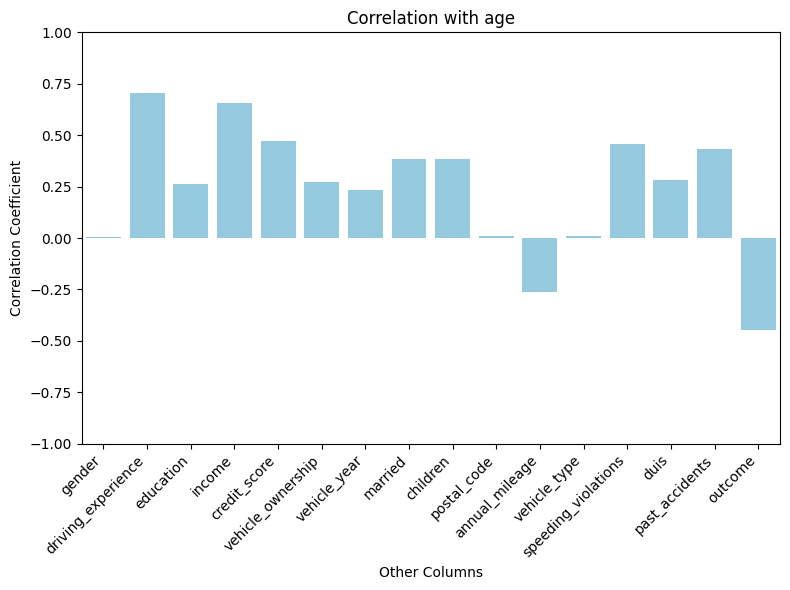

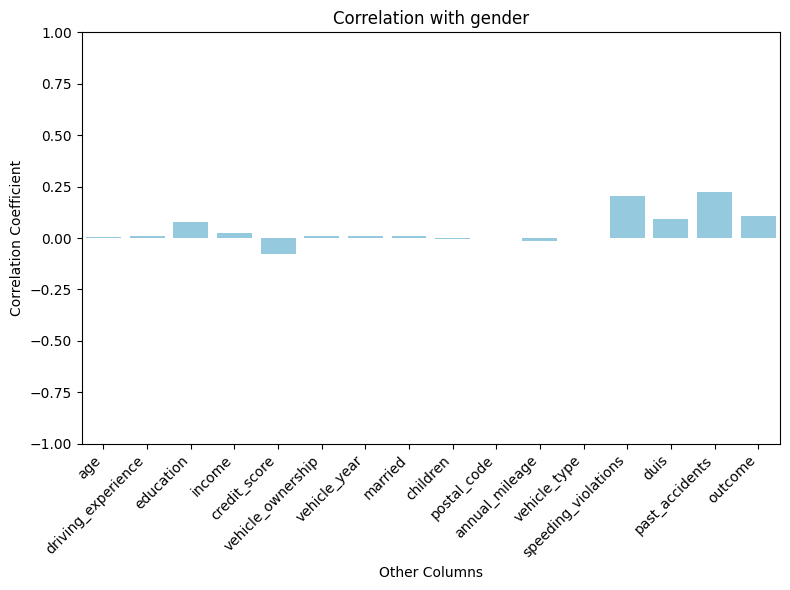

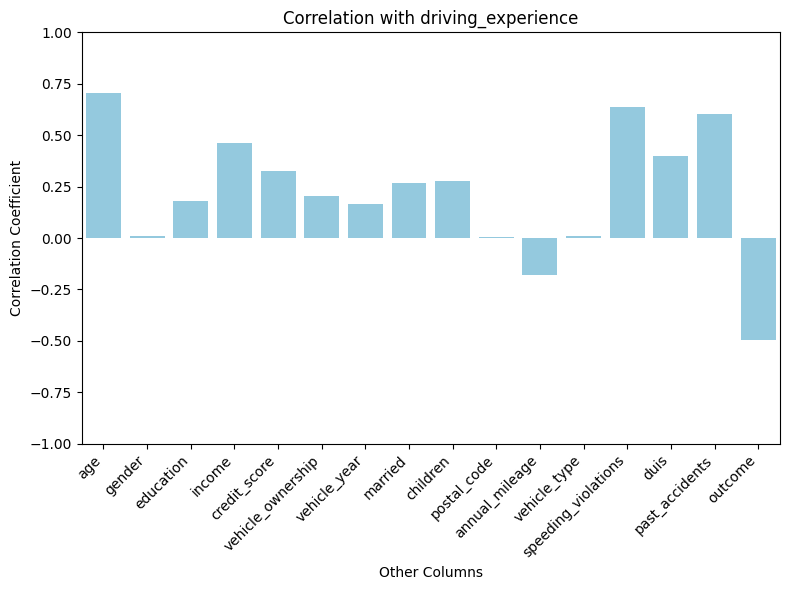

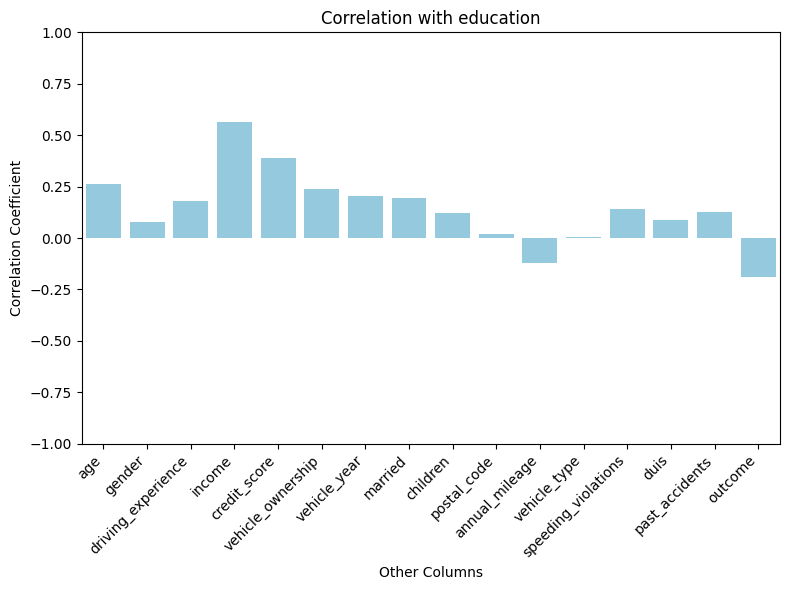

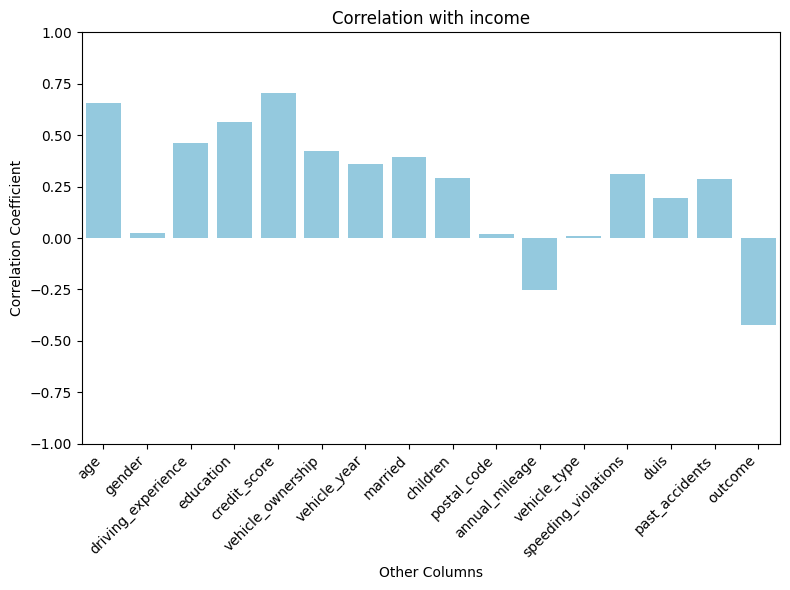

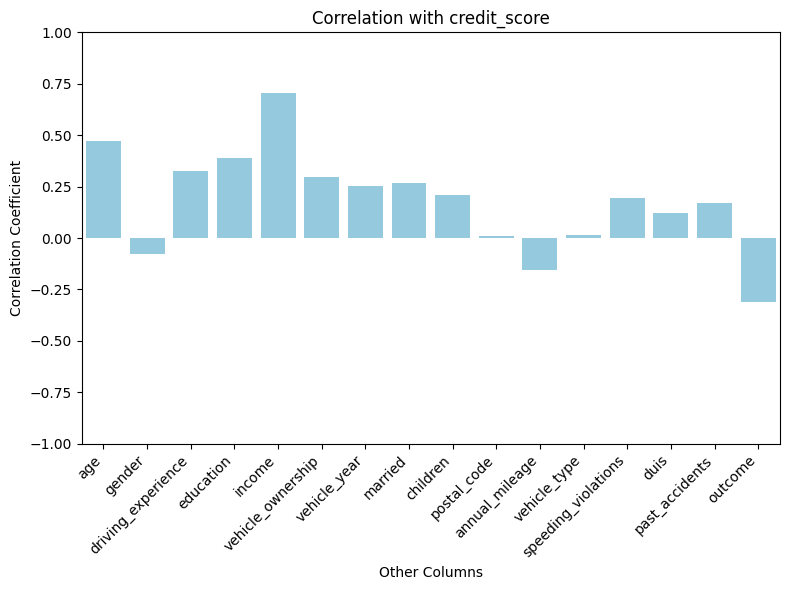

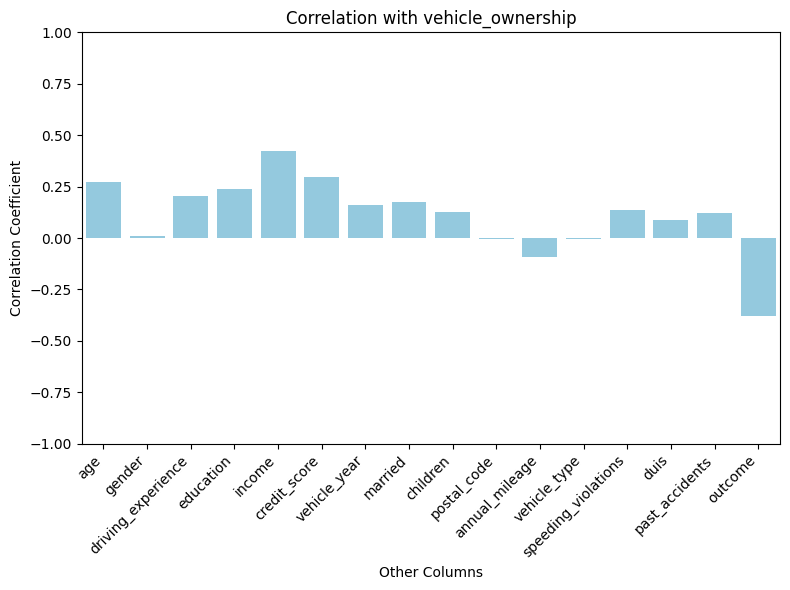

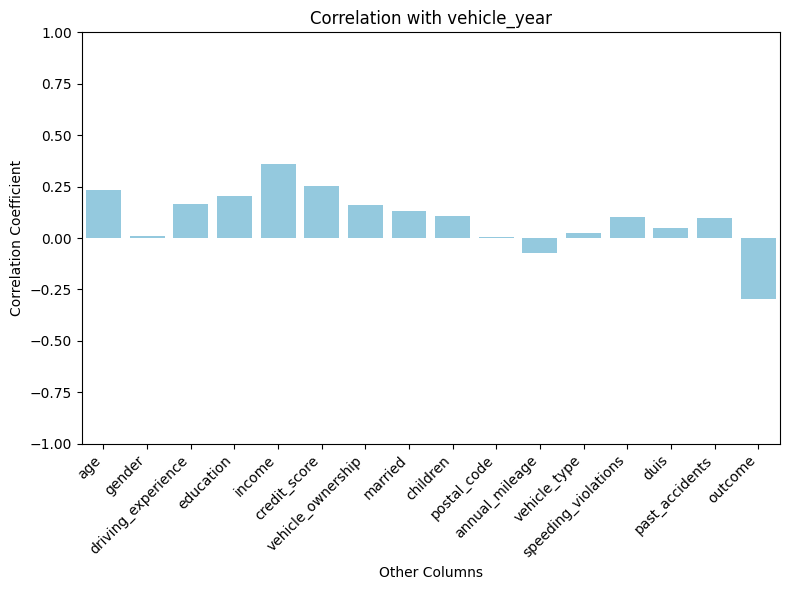

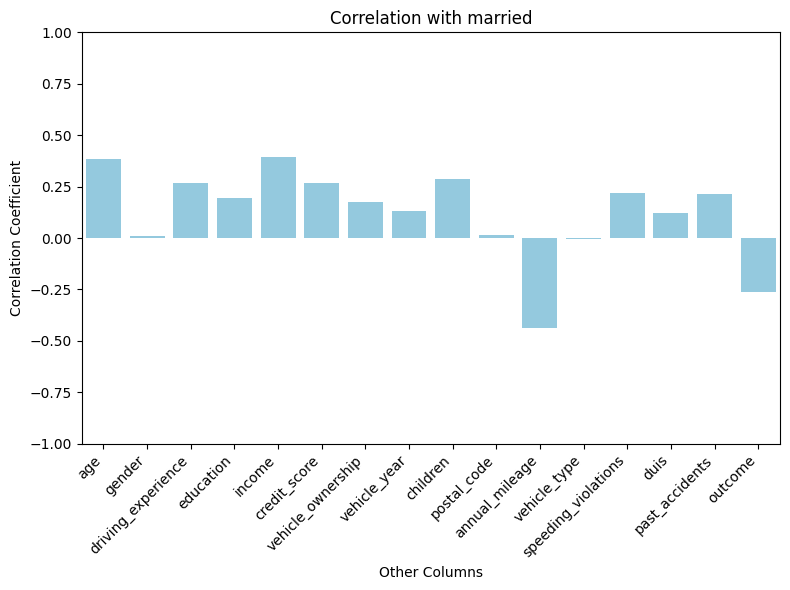

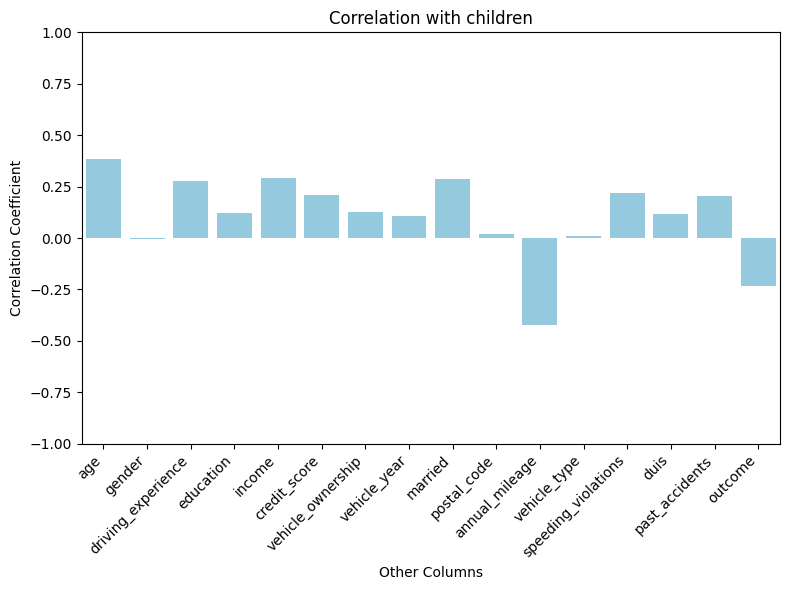

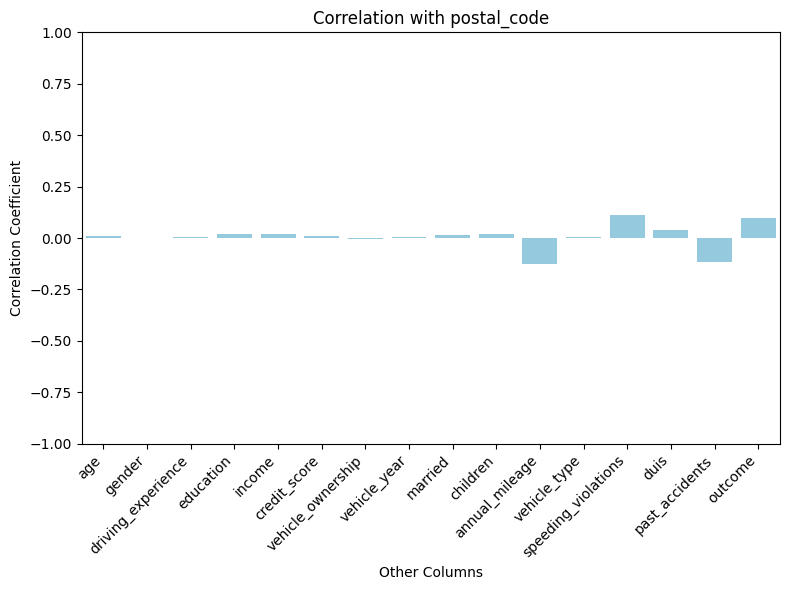

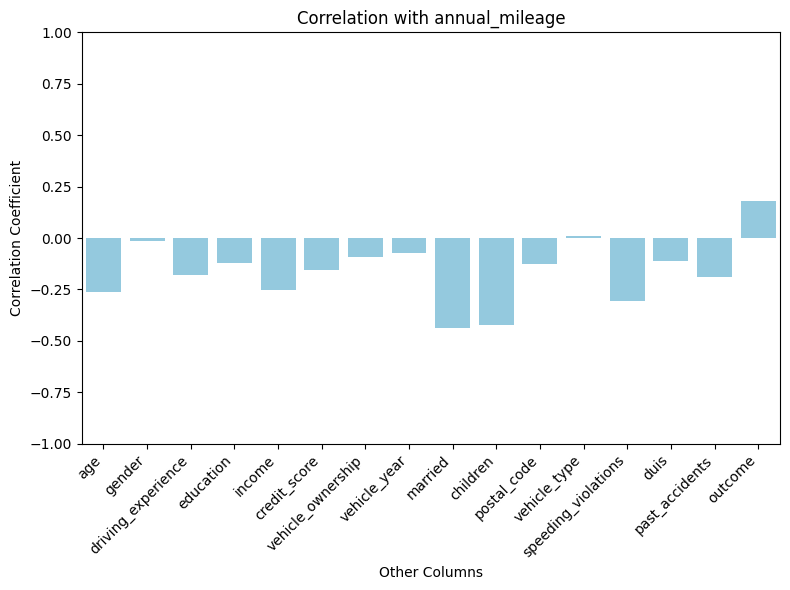

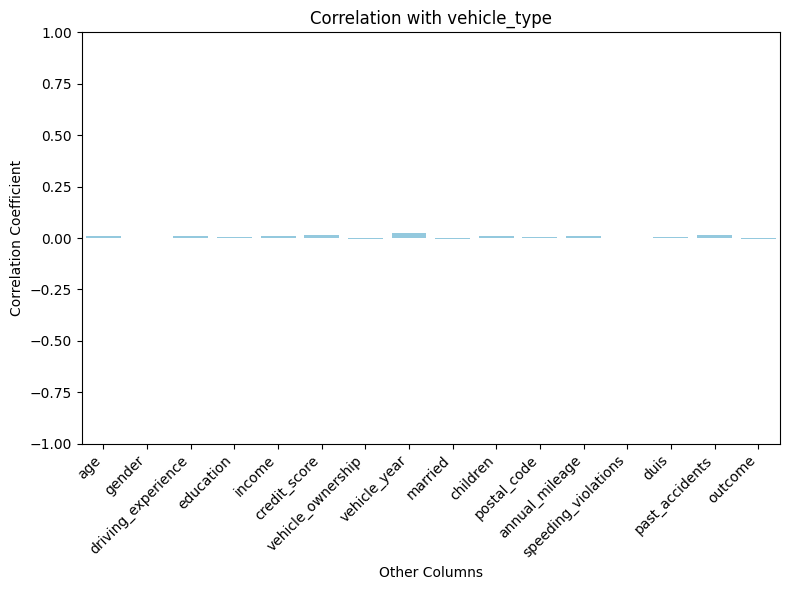

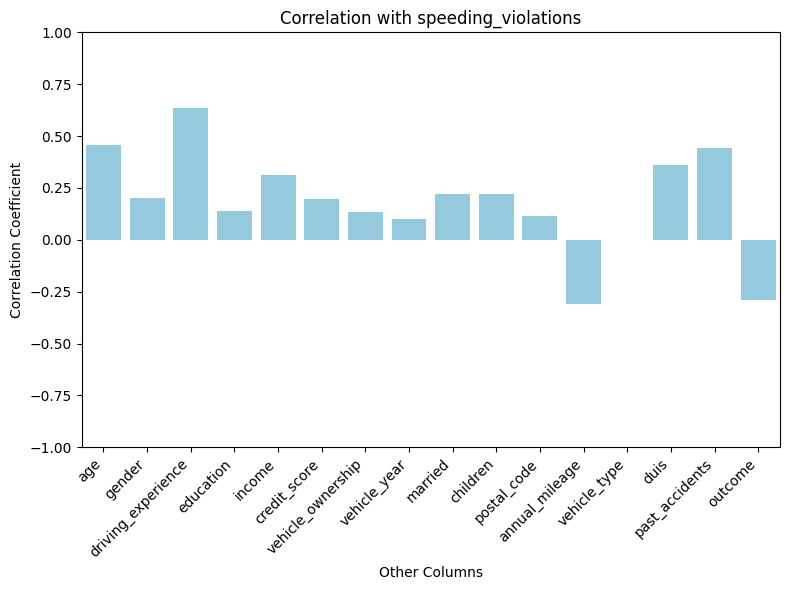

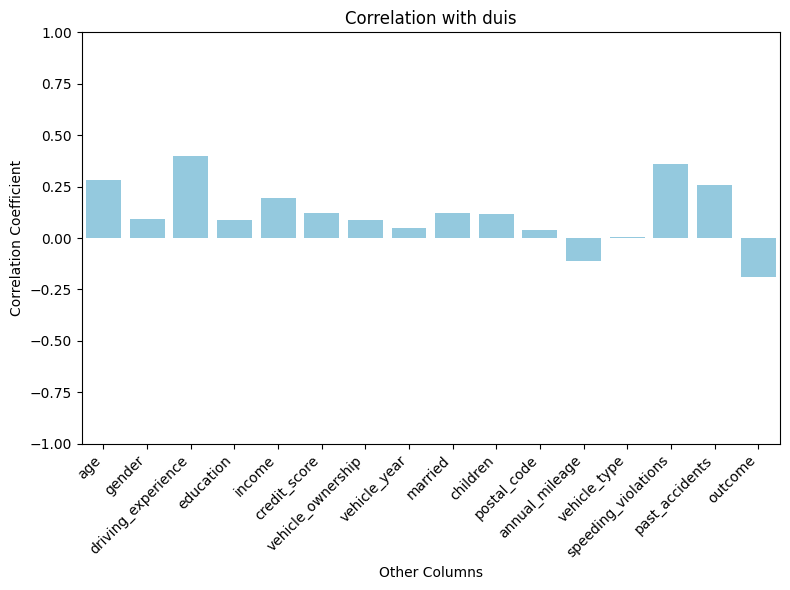

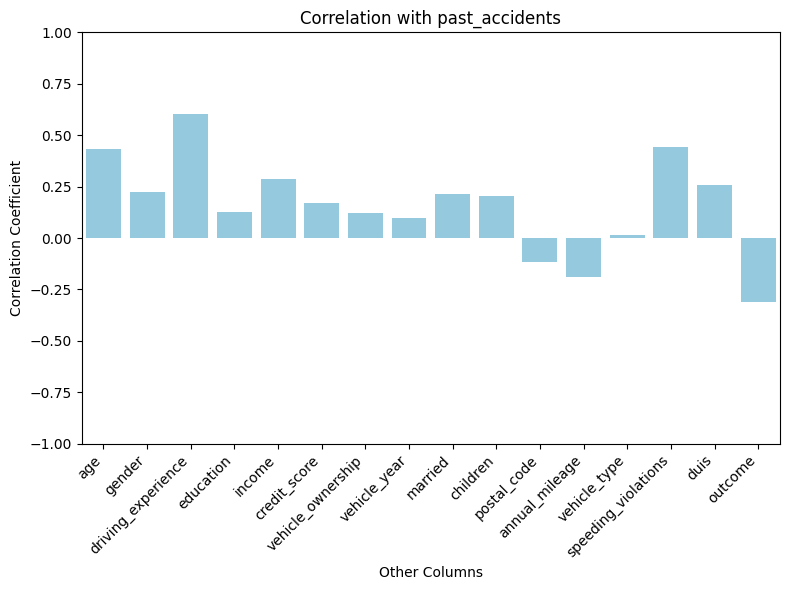

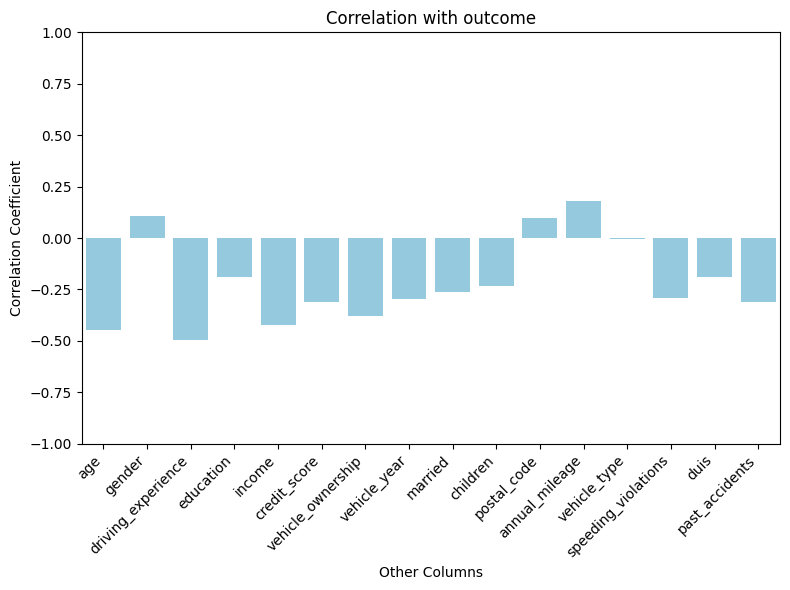

In [213]:
import seaborn as sns


# Calculate the correlation matrix
corr_matrix = cleaned.corr()

# Get the column names
columns = corr_matrix.columns

# Iterate through each column
for i, col in enumerate(columns):
    # Get the correlation values for the current column
    correlations = corr_matrix[col].drop(col)  # Exclude correlation with itself

    # Create a new figure for each column's plot
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed for each plot

    # Create a bar plot for the current column's correlations
    sns.barplot(x=correlations.index, y=correlations.values, ax=ax,
                color='skyblue')  # Use a consistent color

    # Set plot title and labels for each plot
    ax.set_title(f'Correlation with {col}')
    ax.set_xlabel('Other Columns')
    ax.set_ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    ax.set_ylim(-1, 1)

    # Show the plot for the current column
    plt.tight_layout()
    plt.show()
    # No need for a general show() here, it's inside the loop now


In [ ]:
cleaned = cleaned.drop(['postal_code', 'gender', 'age'], axis=1)

### 7 Extraction des jeux d'apprentissage et de test (sujet)

Pour entraîner un modèle et l'évaluer, nous avons besoin d'un jeu d'apprentissage et d'un jeu de test. Créer ces deux jeux consiste à choisir au hasard des éléments dans le jeu de données et à les placer dans deux ensembles distincts. Vous pouvez assez facilement obtenir ces jeux en utilisant les fonctionnalités de Pandas avec un générateur de nombres aléatoires. Cependant, comme indiqué en cours, Scikit-Learn fournit des fonctions prêtes à l'emploi. La fonction la plus simple est train_test_split(). Il existe plusieurs façons de paramétrer cette fonction qui prend en entrée des tableaux Numpy (pour les données d'entrée et de sortie).

Regardez sa documentation puis utilisez cette fonction pour obtenir le jeu d'apprentissage et le jeu de test sous forme de tableaux Numpy.

Quelle proportion du jeu de données initial constitue le jeu de test ?

### 7 Extraction des jeux d'apprentissage et de test (réponse)

3/4 train 
1/4 test

In [ ]:
train, test = train_test_split(cleaned)

train

,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
7285,-0.069972,1.083110,0.957659,0.573744,1.0,-0.659802,1.0,1.0,0.102181,0.223806,0.230657,-0.431020,-0.639263,0.0
8606,-0.069972,-0.272981,0.087376,0.519219,1.0,-0.659802,0.0,1.0,-0.270742,0.223806,-0.661462,-0.431020,-0.639263,0.0
2693,-0.069972,-1.629073,0.087376,0.618000,1.0,-0.659802,0.0,0.0,1.220951,0.223806,-0.661462,-0.431020,-0.639263,0.0
1102,-0.069972,-1.629073,-0.782906,0.421750,1.0,-0.659802,0.0,0.0,0.102181,0.223806,-0.215402,-0.431020,-0.639263,1.0
925,0.939719,1.083110,0.957659,0.679082,1.0,-0.659802,1.0,1.0,-1.016589,0.223806,1.568836,-0.431020,0.571119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,-0.069972,-1.629073,-0.782906,0.469214,1.0,-0.659802,0.0,1.0,0.848028,0.223806,-0.215402,-0.431020,-0.034072,0.0
8671,-0.069972,1.083110,0.957659,0.515813,1.0,1.515607,1.0,1.0,-1.016589,0.223806,-0.215402,-0.431020,-0.639263,0.0
7655,-1.079662,1.083110,0.957659,0.512235,1.0,-0.659802,1.0,1.0,0.102181,0.223806,-0.661462,-0.431020,-0.639263,1.0
9927,0.939719,-0.272981,0.957659,0.591119,0.0,-0.659802,1.0,0.0,0.102181,0.223806,0.676717,3.172827,-0.034072,0.0


### 8 Entraînement d'un modèle (sujet)

Nous sommes à présent en mesure d'utiliser le jeu d'apprentissage pour entraîner un modèle destiné à la classification binaire. Il existe de nombreux algorithmes pour ce problème dont celui du Perceptron que nous avons étudié en TP. Dans le cadre de ce projet, nous proposons d'utiliser un autre algorithme basé sur la régression logistique (appelé également logit).

Dans la librairie Scikit-Learn, la classe LogisticRegression() implante cet algorithme. Entraînez un modèle de régression logistique sur le jeu d'apprentissage en utilisant cette classe.

Il est important de comprendre comment fonctionne l'algorithme. Pour cela, vous pouvez vous aider du document qui présente la méthode de la régression logistique disponible sur MLS, que vous pouvez compléter avec d'autres documents disponibles sur le web. L'idée est de reprendre le principe de la régression linéaire et de l'appliquer à un problème de classification. L'algorithme de régression logistique est basé sur le critère du maximum de vraisemblance. Dans le cas binaire, il suppose que la sortie y peut prendre 2 valeurs : 0 et 1.

Pour vérifier votre compréhension de l'algorithme, répondez aux questions suivantes :

- Hypothèse : Quelle hypothèse fait-on sur le logarithme du rapport des vraisemblances (appelé fonction logit) : log P(y=0∣x)/P(y=1∣x) ?
- Minimisation de la fonction de coût : Quelle technique l'algorithme peut-il utiliser pour minimiser la fonction de coût ?
- Apprentissage : Quels paramètres sont calculés pendant la phase d'apprentissage de l'algorithme ?

### 8 Entraînement d'un modèle (réponse)


In [ ]:

output_train = train.outcome
input_train = train.drop(['outcome'], axis=1)

model = LogisticRegression()

trained = model.fit(input_train, output_train)

### 9 Evaluation du modèle (sujet)

Après la phase d'apprentissage, le modèle entraîné peut être utilisé pour prédire les classes sur le jeu de test.
Effectuez des prédictions sur les données d'entrée du jeu de test.
On cherche maintenant à évaluer la performance du modèle en comparant les classes prédites par le modèle avec les classes réelles fournies dans le jeu de test.

Dans un premier temps, vous pouvez simplement écrire une boucle qui affiche pour chaque échantillon la classe prédite et la classe réelle.
Scikit-Learn propose plusieurs métriques pour obtenir une évaluation quantitative du modèle : accuracy_score(), confusion_matrix(), precision_score(), recall_score(), f1_score().

Analysez la documentation de ces fonctions puis appliquez les sur votre jeu de résultats obtenus. Rappelez la signification de ces différentes métriques et analysez les résultats obtenus.

### 9 Evaluation du modèle (réponse)

TODO

In [217]:
output_test = test.outcome
input_test = test.drop(['outcome'], axis=1)

predicted = trained.predict(input_test)

comparison_array = [{"expected" : int(expected), "predicted": int(predicted)} for expected, predicted in zip(output_test, predicted)]

pd.DataFrame(comparison_array)

,expected,predicted
0,0,0
1,1,1
2,0,0
3,0,1
4,0,0
...,...,...
2495,0,1
2496,0,0
2497,0,1
2498,1,1


In [ ]:


print(f"accuracy_score : {accuracy_score(output_test, predicted)}")
print(f"precision_score : {precision_score(output_test, predicted)}")
print(f"recall_score : {recall_score(output_test, predicted)}")
print(f"f1_score : {f1_score(output_test, predicted)}")

confusion_matrix(output_test, predicted)

accuracy_score : 0.818
precision_score : 0.7305236270753512
recall_score : 0.7009803921568627
f1_score : 0.7154471544715447


array([[1473,  211],
       [ 244,  572]])

### 10 Amélioration de l'évaluation (sujet)

Une façon d'améliorer l'évaluation du modèle est de recourir à la méthode de validation croisée. Cette méthode a été expliquée en cours. Elle consiste à découper aléatoirement le jeu d'entraînement en plusieurs sous-ensembles distincts puis à entraîner et à évaluer le modèle en passes successives. À chaque passe, un bloc est réservé pour l'évaluation et les blocs restants sont utilisés pour l'entraînement.

Scikit-Learn fournit des éléments pour appliquer la validation croisée. La classe KFold permet de réaliser une validation croisée en K passes et la fonction cross_val_score() permet d'obtenir les résultats d'une validation croisée.

Après avoir examiné la documentation de ces deux éléments, utilisez-les pour construire une validation croisée sur le jeu de données. La fonction cross_val_score() retourne un objet dans lequel sont stockés les résultats. Analysez ces résultats et comparez avec les résultats obtenus précédemment sans validation croisée.

### 10 Amélioration de l'évaluation (réponse)


In [ ]:

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = cross_val_score(model, predicted.reshape(-1, 1), np.ravel(output_test.to_numpy().reshape(-1, 1)), cv=kf, scoring='accuracy')

print("Résultats de la validation croisée:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: Accuracy = {score:.4f}")

print(f"\nAccuracy moyenne sur {n_splits} folds: {scores.mean():.4f}")
print(f"Écart-type des scores: {scores.std():.4f}")

print("\nInterprétation:")
print("La validation croisée nous donne une estimation plus robuste de la performance du modèle en l'évaluant sur différentes partitions des données d'entraînement.")
print(f"L'accuracy moyenne estimée est de {scores.mean():.4f} avec une certaine variabilité (écart-type de {scores.std():.4f}).")
print("Comparez cette performance avec celle que vous avez obtenue précédemment sur un seul jeu de test.")
print("Si l'accuracy de la validation croisée est significativement différente de votre évaluation précédente, cela peut indiquer une surestimation ou une sous-estimation de la performance réelle du modèle.")

Résultats de la validation croisée:
Fold 1: Accuracy = 0.8060
Fold 2: Accuracy = 0.8020
Fold 3: Accuracy = 0.8420
Fold 4: Accuracy = 0.8000
Fold 5: Accuracy = 0.8400

Accuracy moyenne sur 5 folds: 0.8180
Écart-type des scores: 0.0189

Interprétation:
La validation croisée nous donne une estimation plus robuste de la performance du modèle en l'évaluant sur différentes partitions des données d'entraînement.
L'accuracy moyenne estimée est de 0.8180 avec une certaine variabilité (écart-type de 0.0189).
Comparez cette performance avec celle que vous avez obtenue précédemment sur un seul jeu de test.
Si l'accuracy de la validation croisée est significativement différente de votre évaluation précédente, cela peut indiquer une surestimation ou une sous-estimation de la performance réelle du modèle.


### 11 Comparaison avec d'autres algorithmes (sujet)

En général, il n'est pas immédiat de trouver l'algorithme de classification qui donnera les meilleurs résultats avec votre jeu de données. Il faut souvent essayer plusieurs algorithmes, plusieurs configurations d'hyperparamètres et comparer la précision des modèles correspondants. L'objectif de cette partie est de comparer 3 classifieurs de la librairie Scikit-Learn qui sont :
- la régression logistique étudiée précédemment
- le perceptron étudié pendant le premier TP
- les K plus proches voisins

La classification à l'aide des K plus proches voisins consiste à classer une donnée dans la classe à laquelle appartiennent ses K plus proches voisins dans l'espace des caractéristiques identifiées par apprentissage. Dans Scikit-Learn, cet algorithme est mis en oeuvre par la classe KNeighborsClassifier.

Un grand intérêt de la bibliothèque Scikit-Learn est de fournir une même interface pour appliquer de nombreux algorithmes d'apprentissage et pour calculer la précision des modèles obtenus (méthodes fit(), predict(), cross_val_score(), ...). En revanche, chaque algorithme possède un jeu d'hyperparamètres spécifiques qu'il faudra spécifier lors de la construction de l'objet classifieur. Il est conseillé d'expérimenter plusieurs configurations pour ces hyperparamètres.

En utilisant ces interfaces, nous vous demandons de construire une portion de code qui évalue conjointement les trois algorithmes de classification sur le jeu de données en suivant les 3 étapes suivantes :

- Apprentissage du modèle sur le jeu d'entraînement
- Évaluation du modèle par validation croisée
- Affichage du score

### 11 Comparaison avec d'autres algorithmes (réponse)


In [ ]:



def display_performances(output_test, predicted) -> None:
	print(f"accuracy_score : {accuracy_score(output_test, predicted)}")
	print(f"precision_score : {precision_score(output_test, predicted)}")
	print(f"recall_score : {recall_score(output_test, predicted)}")
	print(f"f1_score : {f1_score(output_test, predicted)}")

def display_folds_performances(output_test, predicted, n_splits = 5) -> None:
	kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

	scores = cross_val_score(model, predicted.reshape(-1, 1), np.ravel(output_test.to_numpy().reshape(-1, 1)), cv=kf, scoring='accuracy')

	print(f"average score for {n_splits} folds: {scores.mean():.4f}")

logistic_regression = LogisticRegression().fit(input_train, output_train)
perceptron = Perceptron().fit(input_train, output_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(input_train, output_train)

for model in [logistic_regression, perceptron, knn]:
	predicted = model.predict(input_test)

	print(f"model : {type(model)}")
	display_performances(output_test, predicted)
	display_folds_performances(output_test, predicted)
	print("\n")

model : <class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy_score : 0.818
precision_score : 0.7305236270753512
recall_score : 0.7009803921568627
f1_score : 0.7154471544715447
average score for 5 folds: 0.8180


model : <class 'sklearn.linear_model._perceptron.Perceptron'>
accuracy_score : 0.7112
precision_score : 0.6205128205128205
recall_score : 0.2965686274509804
f1_score : 0.4013266998341625
average score for 5 folds: 0.6280


model : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
accuracy_score : 0.8096
precision_score : 0.7196382428940569
recall_score : 0.6825980392156863
f1_score : 0.70062893081761
average score for 5 folds: 0.6960




### 12 Sauvegarde du modèle entraîné (sujet)

Lorsque vous avez trouvé un bon modèle pour votre problème, il faut penser à sa mise en production dans une application. Cela implique de sauvegarder le modèle entraîné et de vérifier son chargement pour réaliser des prédictions avec de nouvelles données dans le système en production.

Un modèle produit avec la bibliothèque Scikit-Learn peut être sauvegardé en utilisant la bibliothèque de sérialisation d'objets qui s'appelle Pickle. Cette bibliothèque dispose des fonctions dump() et load() pour respectivement sauvegarder et charger le modèle. Examinez la documentation de ces fonctions pour connaître leurs paramètres et appliquez les.

### 12 Sauvegarde du modèle entraîné (réponse)

In [ ]:

with open('model_dump.pkl', 'wb') as file:
    pickle.dump(model, file)